# Read experimental data
This notebook will not work as the full experimental data was removed from the repository.

In [1]:
%matplotlib inline

In [4]:
!pip install pyabf

     |████████████████████████████████| 40kB 1.9MB/s eta 0:00:011
  Created wheel for pyabf: filename=pyabf-2.1.10-cp37-none-any.whl size=45900 sha256=3b6a8403b0588be65b008b604f12216c061edba597ee7ea51f6341bf3e9efd51
  Stored in directory: /Users/deismic/Library/Caches/pip/wheels/4c/85/a2/79b2706867f3e41268926f6517ce9b19eca909ea81377a313f
Successfully built pyabf


In [2]:
import pyabf
import numpy as np
import sys
sys.path.append("model/setup")
sys.path.append("model/simulator")
sys.path.append("model/inference")
sys.path.append("model/visualization")
sys.path.append("model/utils")
sys.path.append("model/dataset_proc")
import experimental_data_utils as edu

name = '845_082_0044'
datafile = "model/dataset_proc/data/845_082/"+name+".abf"
abf = pyabf.ABF(datafile)

%load_ext autoreload
%autoreload 2

### Display names of channels

In [9]:
print(abf)
channel_names = abf.adcNames
print(channel_names)

ABF (version 2.0.0.0) with 8 channels (mV, mV, mv, mV, V, nA, mV, V), sampled at 10.0 kHz, containing 1 sweep, having no tags, with a total length of 2.50 minutes, recorded with protocol "C:\Documents and Settings\Marder User\Desktop\Protocol_1".
['I_MTest 1', 'I_MTest 2', 'IN 4', 'IN 6', 'IN 7', 'i2', 'IN 10', 'IN 13']


In [10]:
channel_data = abf.data

In [11]:
LPN = channel_data[3]
PYN = channel_data[1]
PDN = channel_data[2]
LVN = channel_data[6]
sampling_frequency = abf.dataRate

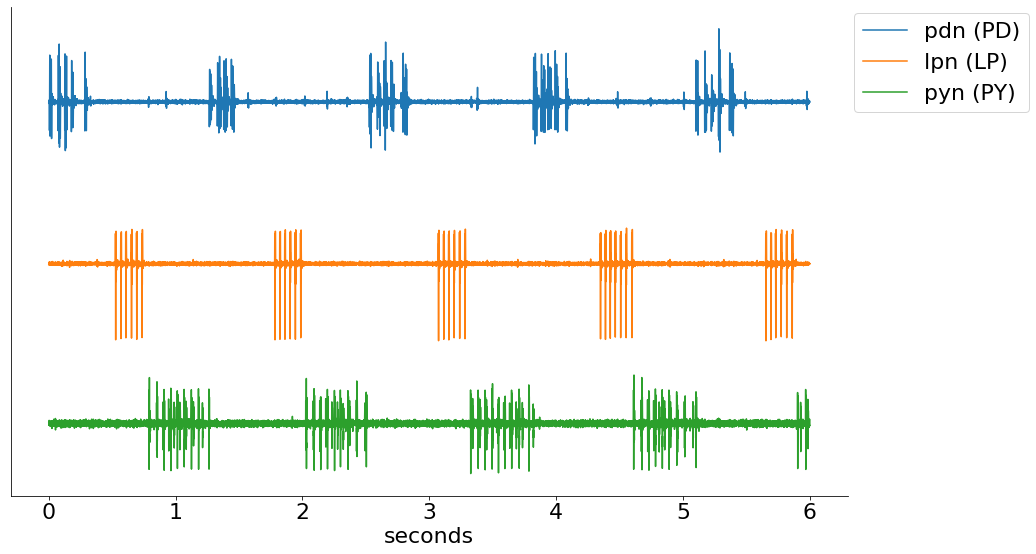

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

font_size = 22
save_fig = False
date_today = '190820'
counter = 0

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
# removing the box
sns.despine()

t = np.linspace(0, 150, len(PDN))
start_index = 0
end_index   = 60000
height_offset = 200

plt.plot(t[start_index:end_index], 2*height_offset+PDN[start_index:end_index]*1)
plt.plot(t[start_index:end_index], height_offset+LPN[start_index:end_index]*55)
plt.plot(t[start_index:end_index], PYN[start_index:end_index]*2)

plt.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right', fontsize=font_size)
plt.xlabel('seconds', fontsize=font_size)
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.get_yaxis().set_visible(False)

plt.show()

In [13]:
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(PDN[:20000])

In [14]:
PD_spikes = edu.calc_spikes(PDN, threshold=20)
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(PD_spikes[:20000])

### LP neuron

In [15]:
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(LPN[:20000], c='orange')

In [16]:
LP_spikes = edu.calc_spikes(LPN, threshold=0.5)
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(LP_spikes[:20000], c='orange')

### PY neuron

In [17]:
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(PYN[:20000], c='g')

In [18]:
PY_spikes = edu.calc_spikes(PYN, threshold=10)
if False:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    plt.plot(PY_spikes[:20000], c='g')

    print()

### Plot PD and PY

In [19]:
if False:
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()
    start_index = 0
    end_index = 20000
    plt.plot(t[start_index:end_index], 1.2+PD_spikes[:20000])
    plt.plot(t[start_index:end_index], PY_spikes[:20000], c='g')
    save_fig=False

    plt.legend(('pdn (PD)', 'pyn (PY)'), bbox_to_anchor=(1.33, 1.01), loc='upper right', fontsize=font_size)
    plt.xlabel('seconds', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.get_yaxis().set_visible(False)

    if save_fig:
        plt.savefig('../../thesis_results/pdf/' + date_today + '_data_857_016_0049_PY_AB_{}.pdf'.format(counter), bbox_inches='tight')
        plt.savefig('../../thesis_results/png/' + date_today + '_data_857_016_0049_PY_AB_{}.png'.format(counter), bbox_inches='tight')
        plt.savefig('../../thesis_results/svg/' + date_today + '_data_857_016_0049_PY_AB_{}.svg'.format(counter), bbox_inches='tight')

    plt.show()

### Get difference between PD and PY

In [20]:
PYminusPD = edu.subtract_PDfromPY(PY_spikes, PD_spikes, vicinity=3, sampling_frequency=sampling_frequency)
if False:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    # removing the box
    sns.despine()

    plt.plot(t[start_index:end_index], 1.2+PYminusPD[:20000], c='k')
    plt.plot(t[start_index:end_index], PY_spikes[:20000], c='g')
    save_fig=False#

    plt.legend(('PYminusPD', 'PY'), bbox_to_anchor=(1.33, 1.01), loc='upper right', fontsize=font_size)
    plt.xlabel('seconds', fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=font_size)
    ax.get_yaxis().set_visible(False)

### Plot spike sorted data

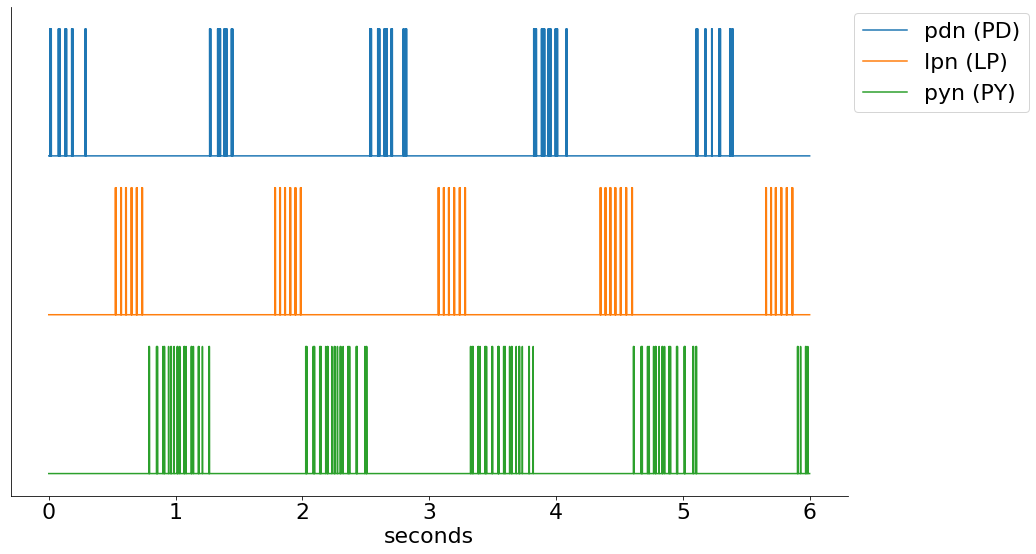

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

font_size = 22
save_fig = False
date_today = '190807'
counter = 0

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
# removing the box
sns.despine()

start_index = 0
end_index   = 60000
height_offset = 200

plt.plot(t[start_index:end_index], 2.5+PD_spikes[start_index:end_index])
plt.plot(t[start_index:end_index], 1.25+LP_spikes[start_index:end_index])
plt.plot(t[start_index:end_index], PY_spikes[start_index:end_index])

np.savez('results/31D_experimental/trace_data_'+name+'.npz', t=t, PD_spikes=PD_spikes, LP_spikes=LP_spikes, PY_spikes=PY_spikes, pdn=PDN, lpn=LPN, pyn=PYN)

plt.legend(('pdn (PD)', 'lpn (LP)', 'pyn (PY)'), bbox_to_anchor=(1.23, 1.01), loc='upper right', fontsize=font_size)
plt.xlabel('seconds', fontsize=font_size)
ax.tick_params(axis='both', which='major', labelsize=font_size)
ax.get_yaxis().set_visible(False)

plt.show()

# Create summary stats

In [29]:
from read_data import reader, ABF_reader


r = ABF_reader(datafile)
r.read_preparation('xxx')
#r = reader('../../dataset_Haddad/828_042_2')
#r.read_preparation(preparation_number, case='spike')

In [30]:
print(r.PY_spike_times)
print(r.PD_spike_times)
print(r.LP_spike_times)

[  0.7899   0.7936   0.8502 ... 149.869  149.8787 149.8825]
[  0.008    0.012    0.0199 ... 149.9841 149.9852 149.9912]
[  0.5259   0.5306   0.5677 ... 149.4043 149.4336 149.4382]


In [31]:
from summ_stats import PrinzExperimStats
s = PrinzExperimStats(include_pyloric_ness=True, include_plateaus=True)

In [34]:
summ_stats_experiment = s.calc(reader=r)[:-1]
for i in summ_stats_experiment:
    print(i)
print(summ_stats_experiment)
np.savez('results/31D_experimental/summstats_prep845_082_0044.npz', summ_stats=summ_stats_experiment)

1170.8585937500002
206.03643410852757
214.3070312499983
412.84218749999985
275.16484375000044
42.04609375000071
481.9257812500009
738.2789062499999
0.17597038208400437
0.18303408489629858
0.3525978198424098
0.23501116635161598
0.035910479689384524
0.41160032801783486
0.6305448926035179
2.5
2.5
2.5
[1170.8586  206.0364  214.307  ...    2.5       2.5       2.5   ]
